In [12]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN

In [2]:
df = pd.read_csv("../data/candy-data.csv")

### Preprocess

In [3]:
num_cols = ["sugarpercent", "pricepercent"]
cat_cols = [
    "chocolate",
    "fruity",
    "caramel",
    "peanutyalmondy",
    "nougat",
    "crispedricewafer",
    "hard",
    "bar",
    "pluribus",
]


In [4]:
preprocessor = ColumnTransformer(
    [("num", StandardScaler(), num_cols), ("bin", "passthrough", cat_cols)]
)

In [5]:
X_preprocessed = preprocessor.fit_transform(df[num_cols + cat_cols])

## Clustering

### K-means

In [27]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_preprocessed)

df["kmeans_cluster"] = kmeans_labels

### DBSCAN

In [24]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_preprocessed)

print(
    f"Number of HDBSCAN clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}"
)
print(f"Number of noise points: {list(dbscan_labels).count(-1)}")

df["dbscan_cluster"] = dbscan_labels

Number of HDBSCAN clusters: 4
Number of noise points: 22


### HDBSCAN

In [25]:
hdbscan = HDBSCAN(min_cluster_size=5, min_samples=3, cluster_selection_epsilon=0.5)
hdbscan_labels = hdbscan.fit_predict(X_preprocessed)

print(
    f"Number of HDBSCAN clusters: {len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)}"
)
print(f"Number of noise points: {list(hdbscan_labels).count(-1)}")

df["hdbscan_cluster"] = hdbscan_labels

Number of HDBSCAN clusters: 5
Number of noise points: 49


## Visualize / interpret clusters

### Apply umap

In [ ]:
reducer = umap.UMAP(random_state=42)
X_2d = reducer.fit_transform(X_preprocessed)

### k-means clusters

In [30]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,kmeans_cluster,dbscan_cluster,hdbscan_cluster
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1,-1,-1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1,3,0
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0,1,-1
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0,-1,-1
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,0,1,-1
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,0,1,-1
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,0,1,3
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,0,-1,-1


In [36]:
df.groupby("kmeans_cluster")[["winpercent"] + num_cols + cat_cols].mean().round(2)

,winpercent,sugarpercent,pricepercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
kmeans_cluster,,,,,,,,,,,,
0,44.33,0.17,0.23,0.21,0.57,0.11,0.07,0.00,0.00,0.18,0.00,0.61
1,59.97,0.57,0.74,0.91,0.06,0.27,0.36,0.21,0.21,0.03,0.64,0.24
2,44.02,0.72,0.38,0.04,0.83,0.08,0.00,0.00,0.00,0.38,0.00,0.79


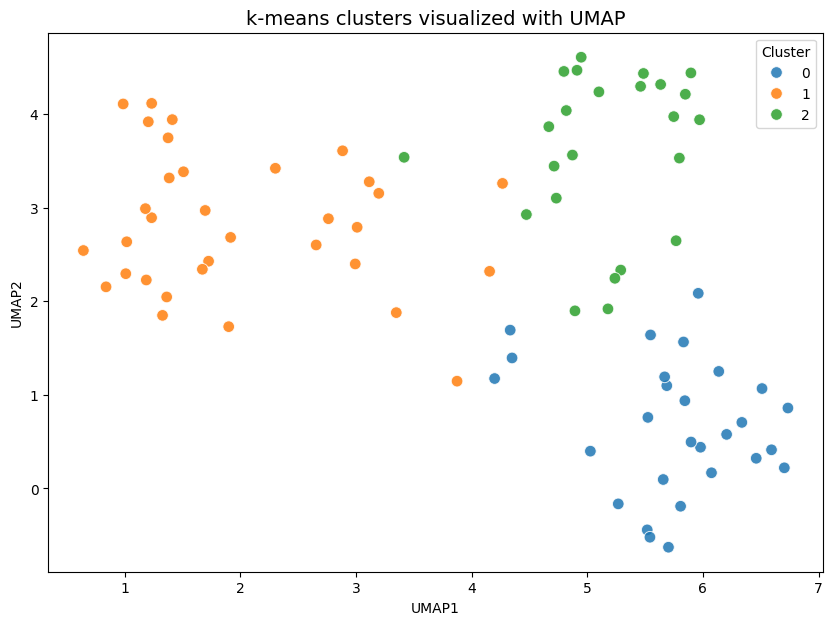

In [14]:
plot_df = pd.DataFrame(X_2d, columns=["UMAP1", "UMAP2"])
plot_df["Cluster"] = kmeans_labels

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=plot_df, x="UMAP1", y="UMAP2", hue="Cluster", palette="tab10", s=70, alpha=0.85
)
plt.title("k-means clusters visualized with UMAP", fontsize=14)
plt.legend(title="Cluster")
plt.show()